In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,recall_score,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier



In [48]:
data=pd.read_csv('fraudTrain.csv')
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


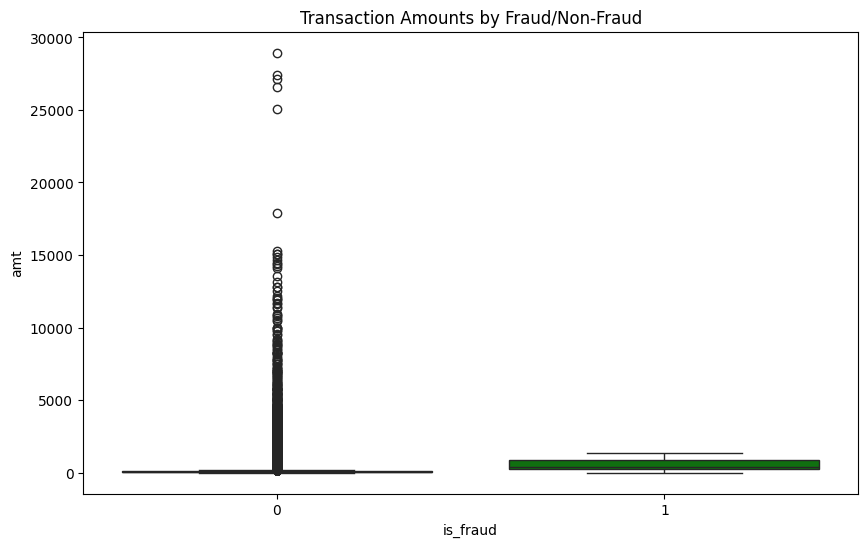

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='amt', data=data, color='green')
plt.title('Transaction Amounts by Fraud/Non-Fraud')
plt.show()

In [50]:
data['trans_date_trans_time']=pd.to_datetime(data['trans_date_trans_time'])
data['trans_day']=data['trans_date_trans_time'].dt.day
data['trans_month']=data['trans_date_trans_time'].dt.month
data['trans_year']=data['trans_date_trans_time'].dt.year
data['trans_hour']=data['trans_date_trans_time'].dt.hour
data['trans_minute']=data['trans_date_trans_time'].dt.minute
data.drop(columns=['trans_date_trans_time'],inplace=True)
data

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_day,trans_month,trans_year,trans_hour,trans_minute
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,1,1,2019,0,0
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,1,1,2019,0,0
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,1,1,2019,0,0
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,1,1,2019,0,1
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,1,1,2019,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,21,6,2020,12,12
1296671,1296671,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,21,6,2020,12,12
1296672,1296672,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,21,6,2020,12,12
1296673,1296673,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,21,6,2020,12,13


In [51]:
# Calculate transactions per hour for each credit card
data['trans_per_hour'] = data.groupby(['cc_num', 'trans_hour'])['trans_hour'].transform('size')

data['trans_per_hour']

,trans_per_hour
0,49
1,75
2,24
3,17
4,76
...,...
1296670,65
1296671,29
1296672,75
1296673,101


In [52]:
data['mean_amt'] = data.groupby('cc_num')['amt'].transform('mean')
data['mean_amt']


,mean_amt
0,87.393215
1,53.949320
2,65.870040
3,72.776673
4,95.178091
...,...
1296670,63.182274
1296671,101.150621
1296672,65.235995
1296673,95.753691


In [53]:
data['relative_amt'] = data['amt'] / data['mean_amt']
data['relative_amt']

,relative_amt
0,0.056869
1,1.987606
2,3.341580
3,0.618330
4,0.440858
...,...
1296670,0.246272
1296671,0.511119
1296672,1.623797
1296673,0.782215


In [54]:
# Define a new column to store the count of transactions in the past hour for each credit card
data['trans_in_past_hour'] = data.groupby('cc_num').apply(
    lambda x: x['trans_hour'].rolling(window=2, min_periods=1).count() - 1
).reset_index(level=0, drop=True)

# Display the result
data[['cc_num', 'trans_hour', 'trans_in_past_hour']]



<ipython-input-54-da50c24165f3>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data['trans_in_past_hour'] = data.groupby('cc_num').apply(


,cc_num,trans_hour,trans_in_past_hour
0,2703186189652095,0,0.0
1,630423337322,0,0.0
2,38859492057661,0,0.0
3,3534093764340240,0,0.0
4,375534208663984,0,0.0
...,...,...,...
1296670,30263540414123,12,1.0
1296671,6011149206456997,12,1.0
1296672,3514865930894695,12,1.0
1296673,2720012583106919,12,1.0


In [55]:
# Calculate the mean transaction amount for each credit card
data['mean_amt_per_card'] = data.groupby('cc_num')['amt'].transform('mean')

# Calculate the difference between each transaction amount and the mean
data['amt_vs_mean'] = data['amt'] - data['mean_amt_per_card']


In [56]:
data


,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_month,trans_year,trans_hour,trans_minute,trans_per_hour,mean_amt,relative_amt,trans_in_past_hour,mean_amt_per_card,amt_vs_mean
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,1,2019,0,0,49,87.393215,0.056869,0.0,87.393215,-82.423215
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,1,2019,0,0,75,53.949320,1.987606,0.0,53.949320,53.280680
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,1,2019,0,0,24,65.870040,3.341580,0.0,65.870040,154.239960
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1,2019,0,1,17,72.776673,0.618330,0.0,72.776673,-27.776673
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,1,2019,0,3,76,95.178091,0.440858,0.0,95.178091,-53.218091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,6,2020,12,12,65,63.182274,0.246272,1.0,63.182274,-47.622274
1296671,1296671,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,6,2020,12,12,29,101.150621,0.511119,1.0,101.150621,-49.450621
1296672,1296672,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,6,2020,12,12,75,65.235995,1.623797,1.0,65.235995,40.694005
1296673,1296673,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,6,2020,12,13,101,95.753691,0.782215,1.0,95.753691,-20.853691


In [57]:
# Calculate the time difference in hours from the previous transaction for each credit card
data['time_diff_from_prev'] = data.groupby('cc_num')['trans_hour'].diff()

# Replace NaN with 0 and convert to integer
data['time_diff_from_prev'] = data['time_diff_from_prev'].fillna(0).astype(int)

# Display the result
data[['cc_num', 'trans_hour', 'time_diff_from_prev']]


,cc_num,trans_hour,time_diff_from_prev
0,2703186189652095,0,0
1,630423337322,0,0
2,38859492057661,0,0
3,3534093764340240,0,0
4,375534208663984,0,0
...,...,...,...
1296670,30263540414123,12,5
1296671,6011149206456997,12,3
1296672,3514865930894695,12,8
1296673,2720012583106919,12,2


In [58]:
# Calculate the fraud rate (probability) for each merchant
merchant_fraud_rate = data.groupby('merchant')['is_fraud'].mean()

# Map this fraud rate back to the original DataFrame as a new feature
data['merchant_fraud_rate'] = data['merchant'].map(merchant_fraud_rate)
data['merchant_fraud_rate']

,merchant_fraud_rate
0,0.014207
1,0.010787
2,0.002111
3,0.003444
4,0.003769
...,...
1296670,0.002622
1296671,0.002284
1296672,0.001079
1296673,0.002094


In [59]:
job_fraud_rate = data.groupby('job')['is_fraud'].mean()

# Map this fraud rate back to the original DataFrame as a new feature
data['job_fraud_rate'] = data['job'].map(job_fraud_rate)


In [60]:
data

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_minute,trans_per_hour,mean_amt,relative_amt,trans_in_past_hour,mean_amt_per_card,amt_vs_mean,time_diff_from_prev,merchant_fraud_rate,job_fraud_rate
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,0,49,87.393215,0.056869,0.0,87.393215,-82.423215,0,0.014207,0.001693
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,0,75,53.949320,1.987606,0.0,53.949320,53.280680,0,0.010787,0.002157
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,0,24,65.870040,3.341580,0.0,65.870040,154.239960,0,0.002111,0.015656
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1,17,72.776673,0.618330,0.0,72.776673,-27.776673,0,0.003444,0.007905
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,3,76,95.178091,0.440858,0.0,95.178091,-53.218091,0,0.003769,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,12,65,63.182274,0.246272,1.0,63.182274,-47.622274,5,0.002622,0.005338
1296671,1296671,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,12,29,101.150621,0.511119,1.0,101.150621,-49.450621,3,0.002284,0.015066
1296672,1296672,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,12,75,65.235995,1.623797,1.0,65.235995,40.694005,8,0.001079,0.006103
1296673,1296673,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,13,101,95.753691,0.782215,1.0,95.753691,-20.853691,2,0.002094,0.003953


In [61]:
high_risk_threshold = 0.05  # e.g., 5%
data['high_risk_merchant'] = data['merchant_fraud_rate'] > high_risk_threshold


In [62]:
data

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,trans_per_hour,mean_amt,relative_amt,trans_in_past_hour,mean_amt_per_card,amt_vs_mean,time_diff_from_prev,merchant_fraud_rate,job_fraud_rate,high_risk_merchant
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,49,87.393215,0.056869,0.0,87.393215,-82.423215,0,0.014207,0.001693,False
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,75,53.949320,1.987606,0.0,53.949320,53.280680,0,0.010787,0.002157,False
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,24,65.870040,3.341580,0.0,65.870040,154.239960,0,0.002111,0.015656,False
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,17,72.776673,0.618330,0.0,72.776673,-27.776673,0,0.003444,0.007905,False
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,76,95.178091,0.440858,0.0,95.178091,-53.218091,0,0.003769,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,65,63.182274,0.246272,1.0,63.182274,-47.622274,5,0.002622,0.005338,False
1296671,1296671,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,29,101.150621,0.511119,1.0,101.150621,-49.450621,3,0.002284,0.015066,False
1296672,1296672,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,75,65.235995,1.623797,1.0,65.235995,40.694005,8,0.001079,0.006103,False
1296673,1296673,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,101,95.753691,0.782215,1.0,95.753691,-20.853691,2,0.002094,0.003953,False


In [63]:
data = data.drop(["Unnamed: 0",'cc_num',"merchant",'first','last','gender','category','street',
], axis=1)
data

,amt,city,state,zip,lat,long,city_pop,job,dob,trans_num,...,trans_per_hour,mean_amt,relative_amt,trans_in_past_hour,mean_amt_per_card,amt_vs_mean,time_diff_from_prev,merchant_fraud_rate,job_fraud_rate,high_risk_merchant
0,4.97,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,...,49,87.393215,0.056869,0.0,87.393215,-82.423215,0,0.014207,0.001693,False
1,107.23,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,...,75,53.949320,1.987606,0.0,53.949320,53.280680,0,0.010787,0.002157,False
2,220.11,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,...,24,65.870040,3.341580,0.0,65.870040,154.239960,0,0.002111,0.015656,False
3,45.00,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,...,17,72.776673,0.618330,0.0,72.776673,-27.776673,0,0.003444,0.007905,False
4,41.96,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,...,76,95.178091,0.440858,0.0,95.178091,-53.218091,0,0.003769,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,Hatch,UT,84735,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,...,65,63.182274,0.246272,1.0,63.182274,-47.622274,5,0.002622,0.005338,False
1296671,51.70,Tuscarora,MD,21790,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,...,29,101.150621,0.511119,1.0,101.150621,-49.450621,3,0.002284,0.015066,False
1296672,105.93,High Rolls Mountain Park,NM,88325,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,...,75,65.235995,1.623797,1.0,65.235995,40.694005,8,0.001079,0.006103,False
1296673,74.90,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,...,101,95.753691,0.782215,1.0,95.753691,-20.853691,2,0.002094,0.003953,False


In [64]:
data = data.drop(['city','state', 'trans_num','job','dob'
], axis=1)
data

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,trans_day,...,trans_per_hour,mean_amt,relative_amt,trans_in_past_hour,mean_amt_per_card,amt_vs_mean,time_diff_from_prev,merchant_fraud_rate,job_fraud_rate,high_risk_merchant
0,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,1,...,49,87.393215,0.056869,0.0,87.393215,-82.423215,0,0.014207,0.001693,False
1,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,1,...,75,53.949320,1.987606,0.0,53.949320,53.280680,0,0.010787,0.002157,False
2,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,1,...,24,65.870040,3.341580,0.0,65.870040,154.239960,0,0.002111,0.015656,False
3,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,1,...,17,72.776673,0.618330,0.0,72.776673,-27.776673,0,0.003444,0.007905,False
4,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,1,...,76,95.178091,0.440858,0.0,95.178091,-53.218091,0,0.003769,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,0,21,...,65,63.182274,0.246272,1.0,63.182274,-47.622274,5,0.002622,0.005338,False
1296671,51.70,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,0,21,...,29,101.150621,0.511119,1.0,101.150621,-49.450621,3,0.002284,0.015066,False
1296672,105.93,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,0,21,...,75,65.235995,1.623797,1.0,65.235995,40.694005,8,0.001079,0.006103,False
1296673,74.90,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,0,21,...,101,95.753691,0.782215,1.0,95.753691,-20.853691,2,0.002094,0.003953,False


In [65]:
features=data.drop("is_fraud", axis=1)
features

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_day,trans_month,...,trans_per_hour,mean_amt,relative_amt,trans_in_past_hour,mean_amt_per_card,amt_vs_mean,time_diff_from_prev,merchant_fraud_rate,job_fraud_rate,high_risk_merchant
0,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,1,1,...,49,87.393215,0.056869,0.0,87.393215,-82.423215,0,0.014207,0.001693,False
1,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,1,1,...,75,53.949320,1.987606,0.0,53.949320,53.280680,0,0.010787,0.002157,False
2,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,1,1,...,24,65.870040,3.341580,0.0,65.870040,154.239960,0,0.002111,0.015656,False
3,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,1,1,...,17,72.776673,0.618330,0.0,72.776673,-27.776673,0,0.003444,0.007905,False
4,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,1,1,...,76,95.178091,0.440858,0.0,95.178091,-53.218091,0,0.003769,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,21,6,...,65,63.182274,0.246272,1.0,63.182274,-47.622274,5,0.002622,0.005338,False
1296671,51.70,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,21,6,...,29,101.150621,0.511119,1.0,101.150621,-49.450621,3,0.002284,0.015066,False
1296672,105.93,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,21,6,...,75,65.235995,1.623797,1.0,65.235995,40.694005,8,0.001079,0.006103,False
1296673,74.90,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,21,6,...,101,95.753691,0.782215,1.0,95.753691,-20.853691,2,0.002094,0.003953,False


In [66]:
target=data["is_fraud"]


In [67]:
target = target.dropna()
target

,is_fraud
0,0
1,0
2,0
3,0
4,0
...,...
1296670,0
1296671,0
1296672,0
1296673,0


In [68]:
features = features.dropna()
features

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,trans_day,trans_month,...,trans_per_hour,mean_amt,relative_amt,trans_in_past_hour,mean_amt_per_card,amt_vs_mean,time_diff_from_prev,merchant_fraud_rate,job_fraud_rate,high_risk_merchant
0,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,1,1,...,49,87.393215,0.056869,0.0,87.393215,-82.423215,0,0.014207,0.001693,False
1,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,1,1,...,75,53.949320,1.987606,0.0,53.949320,53.280680,0,0.010787,0.002157,False
2,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,1,1,...,24,65.870040,3.341580,0.0,65.870040,154.239960,0,0.002111,0.015656,False
3,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,1,1,...,17,72.776673,0.618330,0.0,72.776673,-27.776673,0,0.003444,0.007905,False
4,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,1,1,...,76,95.178091,0.440858,0.0,95.178091,-53.218091,0,0.003769,0.000000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,21,6,...,65,63.182274,0.246272,1.0,63.182274,-47.622274,5,0.002622,0.005338,False
1296671,51.70,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,21,6,...,29,101.150621,0.511119,1.0,101.150621,-49.450621,3,0.002284,0.015066,False
1296672,105.93,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,21,6,...,75,65.235995,1.623797,1.0,65.235995,40.694005,8,0.001079,0.006103,False
1296673,74.90,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,21,6,...,101,95.753691,0.782215,1.0,95.753691,-20.853691,2,0.002094,0.003953,False


In [69]:
print(features.isnull().sum())


amt                    0
zip                    0
lat                    0
long                   0
city_pop               0
unix_time              0
merch_lat              0
merch_long             0
trans_day              0
trans_month            0
trans_year             0
trans_hour             0
trans_minute           0
trans_per_hour         0
mean_amt               0
relative_amt           0
trans_in_past_hour     0
mean_amt_per_card      0
amt_vs_mean            0
time_diff_from_prev    0
merchant_fraud_rate    0
job_fraud_rate         0
high_risk_merchant     0
dtype: int64


In [70]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Define SMOTE and undersampling strategy
smote = SMOTE(sampling_strategy=0.1)  # Generate minority samples up to 10% of the majority class
under_sampler = RandomUnderSampler(sampling_strategy=0.5)  # Downsample the majority class




In [71]:
from imblearn.pipeline import Pipeline

# Create pipeline
pipeline = Pipeline(steps=[('smote', smote), ('under', under_sampler)])
X_res, y_res = pipeline.fit_resample(features, target)
print("Number of NaN values in y:", np.isnan(y_res).sum())

Number of NaN values in y: 0


In [72]:
print(len(X_res), len(y_res))


386748 386748


In [73]:
X_train, X_test, y_train, y_test=train_test_split(features, target, test_size=0.2,random_state=42)
#train_test_split(features_resampled, target_resampled, random_state= 2023, stratify= target_resampled)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (1037340, 23)
X_test: (259335, 23)
y_train: (1037340,)
y_test: (259335,)


In [74]:
from sklearn.linear_model import LogisticRegression


In [75]:
lr_model=LogisticRegression(random_state=42)

In [76]:
lr_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [77]:
lr_predictions=lr_model.predict(X_test)
lr_predictions


array([0, 0, 0, ..., 0, 0, 0])

In [78]:
lr_accuracy=accuracy_score(y_test, lr_predictions)

In [79]:
lr_accuracy


0.9936221489579116

In [80]:
def evaluate_and_save_model(model, X_train, X_test, y_train, y_test, filename):
  model.fit(X_train, y_train)
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_test, y_pred)
  print(f"{model.__class__.__name__}Accuracy:{accuracy:.4f}")
  print(f"\nclassification_report:\n{classification_report(y_test, y_pred)}")
  print("---------------")

  with open(filename, "wb") as file:
     pickle.dump(model, file)


  print(f"Model saved as {filename}")

In [81]:
print("Unique values in y_train:", np.unique(y_train))
print("Unique values in y_test:", np.unique(y_test))

Unique values in y_train: [0 1]
Unique values in y_test: [0 1]


In [82]:
xgb_model=xgb.XGBClassifier(random_state=42)
evaluate_and_save_model(xgb_model, X_train, X_test, y_train, y_test, "xgb_model.pkl")



XGBClassifierAccuracy:0.9981

classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.92      0.74      0.82      1520

    accuracy                           1.00    259335
   macro avg       0.96      0.87      0.91    259335
weighted avg       1.00      1.00      1.00    259335

---------------
Model saved as xgb_model.pkl
